In [1]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import *
import matplotlib.pyplot as plt

In [2]:
alpha = 0.9
l = 0.5
k = 100 * 100
Ra = np.linspace(1, 5000, 1000)
Rb = alpha**(1-l)*k / Ra

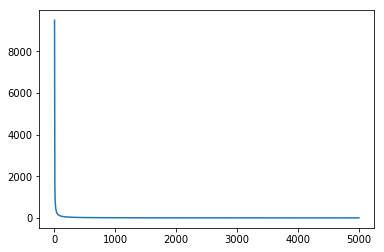

In [3]:
plt.plot(Ra, Rb)
plt.show()

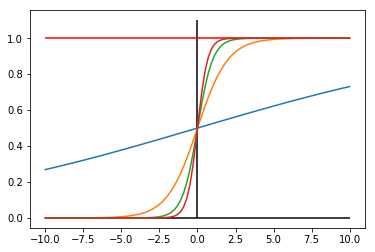

In [4]:
x = np.linspace(-10,10,100)
f = lambda x,z: 1 / (1 + np.exp(-z*x))
fig, ax = plt.subplots(1)
ax.plot(x, f(x,0.1))
ax.plot(x, f(x,1))
ax.plot(x, f(x,2))
ax.plot(x, f(x,3))
ax.hlines(y=0, xmax=10, xmin=-10)
ax.vlines(x=0, ymax=1.1, ymin=0)
ax.hlines(y=1, xmax=10, xmin=-10, color='red')
plt.show()

In [5]:
def haraFunc(m, γ=1.5, M=2, α=1):
    return (1/(1-γ)) * (γ*(M + (α/γ) * m)**(1-γ) - 1)

In [6]:
m = np.linspace(0,20,200)
v_haraFunc = np.vectorize(haraFunc)

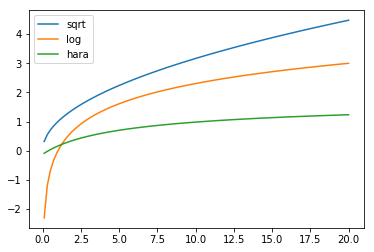

In [7]:
x = np.linspace(0.1,20,100)
plt.plot(x, np.sqrt(x), label="sqrt")
plt.plot(x, np.log(x), label="log")
plt.plot(x, v_haraFunc(x), label="hara")
plt.legend()
plt.show()

## Constant ellipse/circle function

In [8]:
def ellipse(a,b,k,step=0.01):
    if -2 < b < 2:
        with np.errstate(invalid='ignore'):
            upper = ( (a*b - 2*a) - np.sqrt( (a*b - 2*a)**2 - (b**2 - 4) * (-a**2 + k) ) ) / (b**2 / 2 - 2)
            lower = ( (a*b - 2*a) + np.sqrt( (a*b - 2*a)**2 - (b**2 - 4) * (-a**2 + k) ) ) / (b**2 / 2 - 2)
            x1 = np.arange(lower, upper, step)
            x2 = np.arange(upper, lower, -step)
            x = np.concatenate((x1,x2,x1[:1]), axis=0)
            y1 = lambda x: a - b*x/2 - np.sqrt( (a - b*x/2)**2 - (x-a)**2 - a**2 + k )
            y2 = lambda x: a - b*x/2 + np.sqrt( (a - b*x/2)**2 - (x-a)**2 - a**2 + k )
            y = np.concatenate((y1(x1), y2(x2), y1(x1)[:1]), axis=0)
            return (x1,y1(x1))
    else:
        print("b must be in (-2,2)")

def create_market(a,b,k,step=0.01):
    assert -2 < b < 2, 'Parameter b must be in (-2,2)'
    with np.errstate(invalid='ignore'):
        x = np.arange(0, a - np.sqrt(k - a**2), step)
        y = lambda x: a - b*x/2 - np.sqrt( (a - b*x/2)**2 - (x-a)**2 - a**2 + k )
        return (x,y(x))

In [9]:
(x1,y1) = ellipse(a=6,b=1,k=6**2+1)
(x2,y2) = ellipse(a=10,b=1,k=10**2+1)
(x3,y3) = ellipse(a=15,b=1,k=15**2+1)

In [10]:
def price_interval(a,b,k):
    z = a - np.sqrt(k - a**2)
    upper = (b*z - 2*a) / ( 2*(z-a) )
    lower = ( 2*(z-a) ) / (b*z - 2*a)
    return (lower, upper)

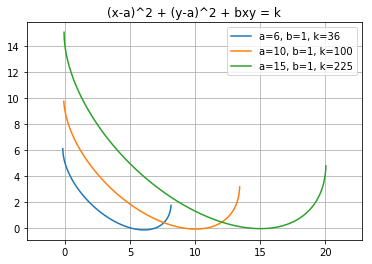

In [11]:
plt.plot(x1, y1, label="a=6, b=1, k=36")
plt.plot(x2, y2, label="a=10, b=1, k=100")
plt.plot(x3, y3, label="a=15, b=1, k=225")
plt.axis('equal')
plt.grid(True)
plt.title("(x-a)^2 + (y-a)^2 + bxy = k")
plt.legend()
plt.show()

In [12]:
def plot_ellipse(a,b,k,step=0.01):
    x,y = ellipse(a,b,k,step)
    plt.figure(figsize=(7,7))
    plt.plot(x, y, label=f"a={a}, b={b:.2f}, k={k}")
    plt.plot(x, x)
    plt.hlines(y=0, xmin=-10, xmax=40)
    plt.vlines(x=0, ymin=-10, ymax=40)
    plt.axis('equal')
    plt.grid(True)
    plt.title("(x-a)^2 + (y-a)^2 + bxy = k")
    plt.legend()
    plt.show()
    print(price_interval(a,b,k))

In [13]:
w_a = widgets.IntSlider(value=10, min=2, max=30, step=1)
w_b = widgets.FloatSlider(value=1., min=-2.01, max=1.99, step=0.01)
w_k = widgets.IntSlider(value=100, min=4, max=900, step=1)
interact(plot_ellipse, a=w_a, b=w_b, k=w_k)

interactive(children=(IntSlider(value=10, description='a', max=30, min=2), FloatSlider(value=1.0, description=…

<function __main__.plot_ellipse>

There are **two ways** to adjust relative price range:
- Add more liquidity
- Increase $a$

When one deposits an arxilary amount, change $a, b$ such that relative price unchanges. But we can let $b$ fixed to calculate $a$ only.


In [14]:
# Assume b1 == b2
def calculate_a(x1,y1,a1,b1,x2,y2,b2):
    c1 = 2*(x1-a1) + b1*y1
    d1 = 2*(y1-a1) + b1*x1
    if abs(c1*y2 - d1*x2) <= 1e2:
        c1 += c1*0.01
#     if x2 == y2:
#         x2 += 1
    a2 = ((2*c1-b2*d1)*y2 + (b2*c1-2*d1)*x2) / (2*(c1-d1))
    return a2

In [15]:
a1 = 6000
b1 = 0
x1 = 1200
y1 = 6000 - np.sqrt(2*5000**2 - (x1-a1)**2)
x2 = x1 + 500
y2 = y1 + 50
b2 = 0
a2 = calculate_a(x1,y1,a1,b1,x2,y2,b2)
print(a2)

12005.962323389174


In [16]:
k2 = (x2-a2)**2 + (y2-a2)**2 + b2*x2*y2
k1 = (x1-a1)**2 + (y1-a1)**2 + b1*x1*y1
print(price_interval(a1,b1,k1))
print(price_interval(a2,b2,k2))

(0.6236095644623235, 1.6035674514745464)
(0.7740037415367502, 1.2919834186002048)


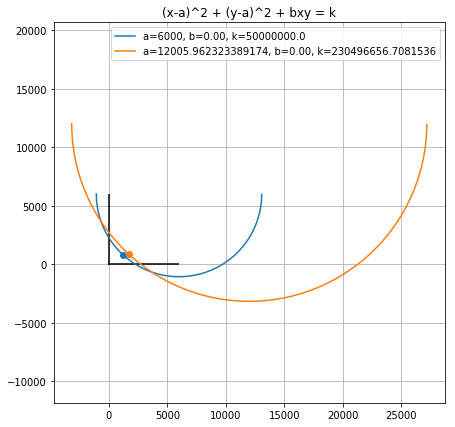

In [17]:
e1 = ellipse(a1,b1,k1,step=1)
e2 = ellipse(a2,b2,k2,step=1)
plt.figure(figsize=(7,7))
plt.plot(e1[0], e1[1], label=f"a={a1}, b={b1:.2f}, k={k1}")
plt.plot(e2[0], e2[1], label=f"a={a2}, b={b2:.2f}, k={k2}")
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.hlines(y=0, xmin=-100, xmax=6000)
plt.vlines(x=0, ymin=-100, ymax=6000)
plt.axis('equal')
plt.grid(True)
plt.title("(x-a)^2 + (y-a)^2 + bxy = k")
plt.legend()
plt.show()

## Cost function

In [18]:
def cost(q,a,b):
    c = np.sum([(q_i - a)**2 for q_i in q])
    for i in range(len(q)):
        for j in range(i+1, len(q)):
            c += b*q[i]*q[j]
    return c

## Marginal Price Function

In [19]:
def marginal_price(token,q,a,b):
    return (2*(q[token] - a) + b*q[1-token]) / (2*(q[1-token] - a) + b*q[token])

## Swap function

In [20]:
def swap(token_out, amount_out, token_in, a, b, q):
    k = cost(q,a,b)
    q[token_out] -= amount_out
    # A*q_o^2 - B*q_o + C = 0
    B = 2*a - b*np.sum([q[j] for j in range(len(q)) if j != token_in])
    C = a**2 - k
    C += np.sum([(q[j] - a)**2 for j in range(len(q)) if j != token_in])
    C += b * np.sum([[q[k]*q[l] for l in range(k+1, len(q)) if l != token_in] for k in range(len(q)) if k != token_in])
    tmp = q[token_in]
    q[token_in] = (B - np.sqrt(B**2 - 4*C)) / 2
    print(f"Marginal price of token {token_out}:",marginal_price(token_out,q,a,b))
    return q[token_in] - tmp

## Deposit Function

In [21]:
# Keep the relative price fixed
def deposit_func1(q,dq,a,b):
    x1 = q[0]
    y1 = q[1]
    x2 = q[0] + dq[0]
    y2 = q[1] + dq[1]
    q += dq
    c1 = 2*(x1-a1) + b1*y1
    d1 = 2*(y1-a1) + b1*x1
    a2 = ((2*c1-b2*d1)*y2 + (b2*c1-2*d1)*x2) / (2*(c1-d1))
    return a2

In [22]:
# Keep large price interval
def deposit_func2(q,dq=np.array([0.,0.]),b=0,f=1):
    assert len(dq) == len(q), "q and dq must have the same size."
    assert (dq >= 0).all()
    q += dq
    with np.errstate(invalid='ignore'):
        a = q[0]+q[1]+np.sqrt( (2-b)*q[0]*q[1] + f)
    return a

In [33]:
# Keep large price interval and tracking orginal price
def deposit_func3(q,old_a,old_b,dq=np.array([0.,0.]),f=1):
    assert len(dq) == len(q), "q and dq must have the same size."
    assert (dq >= 0).all(), "Provided liquidity must be non-negative."
    
    p = ( 2*(q[0]-old_a) + old_b*q[1] )/( 2*(q[1]-old_a) + old_b*q[0] )
    old_q = q.copy()
    q += dq
    if abs(p*q[0] - q[1]) > 1e-1:
        a = (q[0]+q[1]) + q[0]*q[1]*(1-p)/(p*q[0] - q[1]) + np.sqrt(f + (q[0]**2 * q[1]**2 * (1-p)**2)/(p*q[0]-q[1])**2)
        b = 2*(q[0] - p*q[1])/(p*q[0] - q[1]) - 2*(1-p)/(p*q[0] - q[1]) * a
    else:
        b = old_b
        a = q[0]+q[1]+np.sqrt( (2-b)*q[0]*q[1] + f)
    upper_bound = (( (p+1/p)*q[1] - np.sqrt( (p-1)**2*f + (p+1/p)**2*q[1]**2 - 4*q[1]**2) ) / (2*p) ) - old_q[0]
    assert dq[0] < upper_bound, f"First depositted token must be less than {upper_bound}" 
    return (a, b)

q: [ 100. 1000.]
Initialize market:
price interval: (0.002043838561683823, 489.2754343455322)
k: 2393914.506540208
Trading:
Get: 10 of token 0
Marginal price of token 0: 2.8023011390341046
Pay: 27.21471846464351 of token 1
q: [  90.         1027.21471846]
Depositting: (160.0794,10000.0)
(a,b)=(1547.2247757000946,0.0)
price before depositting: 2.8023011390341046
new market: (12239.916895808487,1.66398100335085)
pool: (250.0794,11027.214718464644)
price after depositting: 2.8023011390341046


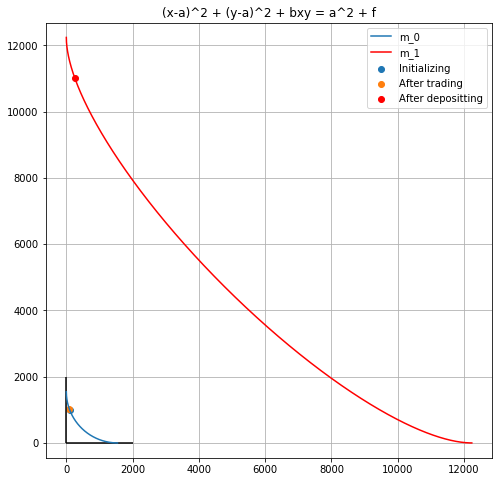

In [37]:
price = lambda q,a,b: ( 2*(q[0]-a) + b*q[1] )/( 2*(q[1]-a) + b*q[0] )
q = np.array([100.,1000.])
b = 0.
f = 10
print("q:",q)
plt.figure(figsize=(8,8))
# Intialize market
print('Initialize market:')
a = deposit_func2(q,f=f)
k = cost(q,a,b)
print("price interval:", price_interval(a,b,k))
print("k:",k)
e_0 = create_market(a,b,k,step=1)
plt.plot(e_0[0], e_0[1], label="m_0")
plt.scatter(q[0],q[1], label="Initializing")

# Trading
print('Trading:')
token_out = 0
amount_out = 10
token_in = 1
print(f"Get: {amount_out} of token {token_out}")
amount_in = swap(token_out, amount_out, token_in, a, b, q)
print(f"Pay: {amount_in} of token {token_in}")
print("q:",q)
plt.scatter(q[0],q[1],label="After trading")

# Depositing
dq = np.array([160.0794,10000.])
print(f'Depositting: ({dq[0]},{dq[1]})')
print(f'(a,b)=({a},{b})')
print(f'price before depositting: {price(q,a,b)}')
new_a, new_b = deposit_func3(q,a,b,dq,f)
print(f'new market: ({new_a},{new_b})')
print(f'pool: ({q[0]},{q[1]})')
print(f'price after depositting: {price(q,new_a,new_b)}')
new_k = cost(q,new_a,new_b)
e_1 = create_market(new_a,new_b,new_k,step=1)
plt.plot(e_1[0], e_1[1], label="m_1", color='red')
plt.scatter(q[0],q[1], label="After depositting", color='red')

plt.hlines(y=0, xmin=-10, xmax=2000)
plt.vlines(x=0, ymin=-10, ymax=2000)
plt.axis('equal')
plt.grid(True)
plt.title("(x-a)^2 + (y-a)^2 + bxy = a^2 + f")
plt.legend()
plt.show()

- Trading some transactions to get the desired price then withdraw all liquidity in order to get profit.
- Calculate impermanent loss of liquidity providers.
- Calculate slippage rate.